# Gradient Descent


In [19]:
# importing important library
import numpy as np
import pandas as pd 

#For ploting graph
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [20]:
# Dataset in csv file
df = pd.read_csv("taxis.csv").dropna()




In [21]:
df.iloc[0]

pickup             2019-03-23 20:21:09
dropoff            2019-03-23 20:27:24
passengers                           1
distance                           1.6
fare                               7.0
tip                               2.15
tolls                              0.0
total                            12.95
color                           yellow
payment                    credit card
pickup_zone            Lenox Hill West
dropoff_zone       UN/Turtle Bay South
pickup_borough               Manhattan
dropoff_borough              Manhattan
Name: 0, dtype: object

In [22]:
#Setting x and y
X = df.distance
y = df.fare

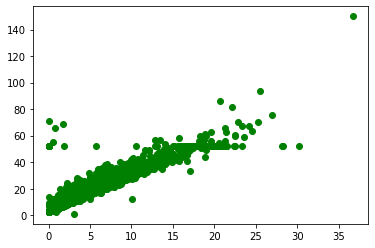

In [23]:
plt.scatter(X,y, color = 'g')

**Fancy Plot Alert**

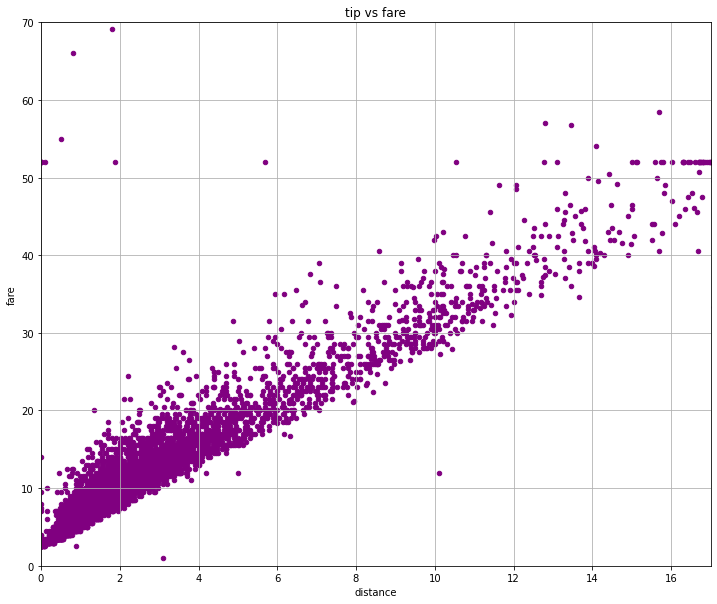

In [24]:
df.plot(kind='scatter',x= 'distance',y='fare',color='purple',figsize = (12,10), grid = True)
plt.gca().set(xlim=(0, 17), ylim=(0, 70) )
plt.xlabel('distance')
plt.ylabel('fare')
plt.title('tip vs fare')
plt.show()

### Fun Math to show what is the gradient descent

In [25]:
f = lambda x: x**3-3*x**2+6

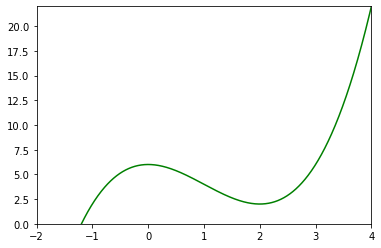

In [26]:
x = np.linspace(-2,4,1000)
plt.plot(x,f(x), color = 'g')
plt.xlim([-2,4])
plt.ylim([0,22])
plt.show()

The amount that the weights are updated during training is referred to as the step size or the “learning rate.” 

In [27]:

x_old = 0
x_new = 4 # The algorithm starts at x=4
n_k = 0.05 # step size
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]

# returns the value of the derivative of our function
def f_prime(x):
    return 3*x**2-6*x
 
while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
print("Local minimum occurs at:", x_new)
print("Number of steps:", len(x_list))

Local minimum occurs at: 2.0001918587194885
Number of steps: 24


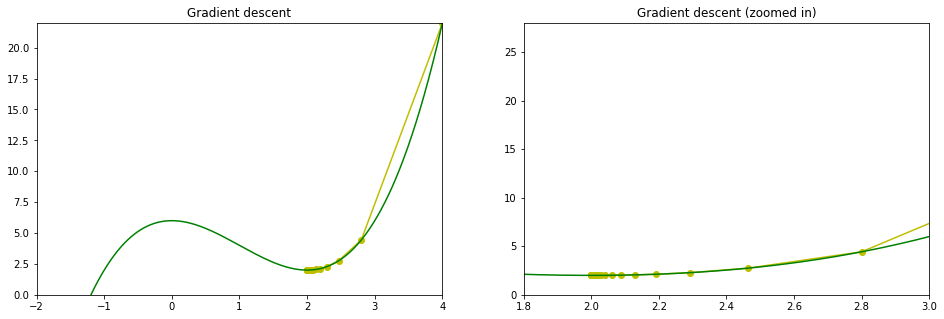

In [28]:
plt.figure(figsize=[16,5])
plt.subplot(1,2,1)
plt.scatter(x_list,y_list,c="y")
plt.plot(x_list,y_list,c="y")
plt.plot(x,f(x), c="g")
plt.xlim([-2,4])
plt.ylim([0,22])
plt.title("Gradient descent")
plt.subplot(1,2,2)
plt.scatter(x_list,y_list,c="y")
plt.plot(x_list,y_list,c="y")
plt.plot(x,f(x), c="g")
plt.xlim([1.8,3])
plt.ylim([0,28])
plt.title("Gradient descent (zoomed in)")
plt.show()

In [29]:
x_old = 0
x_new = 1 # The algorithm starts at x=1
n_k = 0.05 # step size
precision = 0.0001

x_list, y_list = [x_new], [f(x_new)]

# returns the value of the derivative of our function
def f_prime(x):
    return 3*x**2-6*x
 
while abs(x_new - x_old) > precision:
    x_old = x_new
    s_k = -f_prime(x_old)
    x_new = x_old + n_k * s_k
    x_list.append(x_new)
    y_list.append(f(x_new))
print("Local minimum occurs at:", x_new)
print("Number of steps:", len(x_list))

Local minimum occurs at: 1.999826176943345
Number of steps: 28


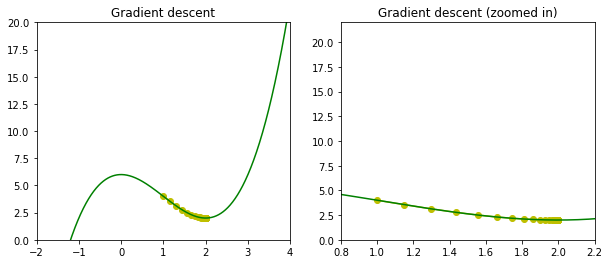

In [30]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
plt.scatter(x_list,y_list,c="y")
plt.plot(x_list,y_list,c="y")
plt.plot(x,f(x), c="g")
plt.xlim([-2,4])
plt.ylim([0,20])
plt.title("Gradient descent")
plt.subplot(1,2,2)
plt.scatter(x_list,y_list,c="y")
plt.plot(x_list,y_list,c="y")
plt.plot(x,f(x), c="g")
plt.xlim([0.8,2.2])
plt.ylim([0,22])
plt.title("Gradient descent (zoomed in)")
plt.show()



If the step size is too small, then convergence will be very slow, but if we make it too large, then the method may fail to converge at all.

Conclusion: Learning rate matters!

Lets go ahead and find Mean square Error between Batch size Gradient Descent and Stochastic Gradient Descent

## Batch Gradient Descent

In [31]:
#function for batch gradient descent
def batch_gradient_descent(X,y, learn_rate = 0.05, epoch = 10):
    m, b = 0.2, 0.2 
    log, mse = [], [] 
    N = len(X) 
    
    for __ in range(epoch):
        f = y - (m * X + b)

        m -= learn_rate * (-2 * X.dot(f).sum() / N)
        b -= learn_rate * (-2 * f.sum() / N)
        
        log.append((m,b))
        mse.append(mean_squared_error(y, (m * X + b)))
        
    return m, b, log, mse

In [32]:
y.head()

0     7.0
1     5.0
2     7.5
3    27.0
4     9.0
Name: fare, dtype: float64

#### Below ⬇ our learning Rate is 0.01

An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed.

MSE: 12.570080809792167


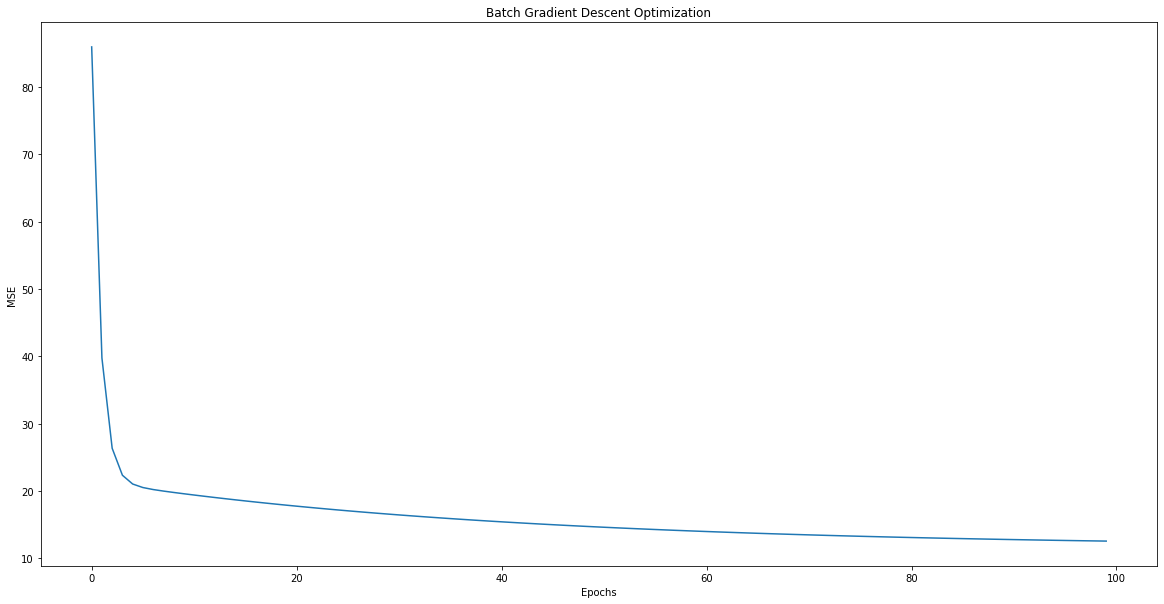

In [36]:
#Running the model
m, b, log, mse = batch_gradient_descent(X, y, learn_rate = 0.01, epoch = 100)

y_pred = m * X + b

print("MSE:",mean_squared_error(y, y_pred))

#Graphing the results
plt.figure(figsize=(20,10))
plt.plot(range(len(mse)), mse)
plt.title('Batch Gradient Descent Optimization')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

## Stochastic Gradient Descent

In [37]:
def stochastic_gradient_descent(X, y, learn_rate = 0.05, epoch = 10, batch_size=1):
    m, b = 0.5, 0.5 # initial parameters
    log, mse = [], [] # lists to store learning process
    
    for __ in range(epoch):
        indexes = np.random.randint(0, len(X), batch_size) # random sample
        
        Xs = np.take(X, indexes)
        ys = np.take(y, indexes)
        N = len(Xs)
        
        f = ys - (m*Xs + b)
        
        #updating parameters m and b
        m -= learn_rate * (-2 * Xs.dot(f).sum() / N)
        b -= learn_rate * (-2 * f.sum() / N)
        
        log.append((m, b))
        mse.append(mean_squared_error(y, m*X+b))        
    
    return m, b, log, mse

In [38]:
#### Here, our learning Rate is 0.01

MSE: 78.0328478977144


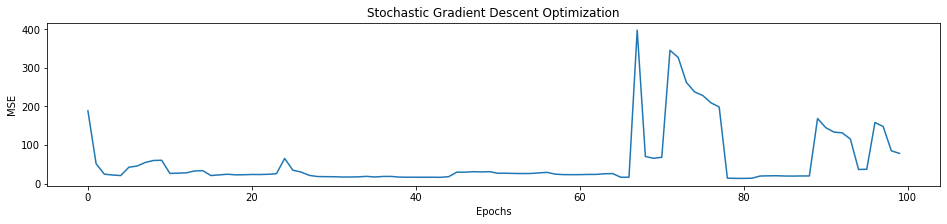

In [39]:
#Running the model
m, b, log, mse = stochastic_gradient_descent(X, y, learn_rate = 0.01, epoch = 100, batch_size=2)

y_pred = m * X + b

print("MSE:",mean_squared_error(y, y_pred))

#Graphing the results
plt.figure(figsize=(16,3))
plt.plot(range(len(mse)), mse)
plt.title('Stochastic Gradient Descent Optimization')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

Conclusion:


MSE in Batch Gradiant Descent = 12.57


 MSE in Stcohastic Gradiant Descent = 78.03

Here, MSE is better in Batch Gradient Descent  